In [49]:
import numpy as np
from scipy.io.wavfile import read
from scipy import signal, arange
import matplotlib.pyplot as plt
import matplotlib.axes as matax
import sys

In [50]:
#samplingFrequency
sampFreq, sound = read('wav1.wav');
print(sampFreq, len(sound), min(sound), max(sound));    

65501 78601546 -1275 1254


In [51]:
#seconds 
initTime = 15;
duration = 5;

In [52]:
start = sampFreq * initTime;
end = start + sampFreq * duration;
s1 = sound[start:end];
print(len(s1))

327505


In [53]:
timeArray = np.arange(0, end-start, 1)
timeArray = timeArray / sampFreq
#timeArray = timeArray

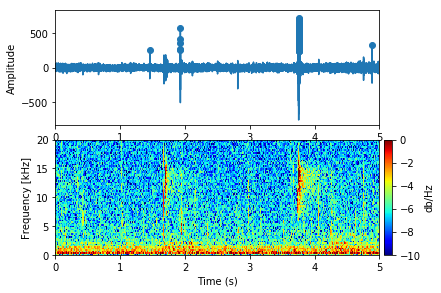

In [54]:
fig = plt.figure()
#fig, axes = plt.subplots(nrows=2, ncols=1)
ax1 = fig.add_axes( [0.12, 0.55, 0.75, 0.4] )
ax2 = fig.add_axes( [0.12, 0.1, 0.75, 0.4] )
ax3 = fig.add_axes( [0.88, 0.1, 0.02, 0.4] )
    
#--- Figure 1. ---#
ax1.plot(timeArray, s1)
ax1.set_ylabel('Amplitude')
ax1.set_xlim(0, duration)
ax1.margins(x=0)

#--- Figure 2. ---#
f, t, Sxx = signal.spectrogram(s1, sampFreq, nperseg=256)
im = ax2.pcolormesh(t, f/1000, np.log(Sxx), cmap='jet' )

tendev = np.std(s1) * 10
a = s1 > tendev
#for values in s2:
#    if(values < tendev)
#        values = 0
#print(tendev)
ax1.scatter(timeArray[a],s1[a])

ax2.set_ylabel('Frequency [kHz]')
ax2.set_ylim(0,20)
ax2.set_xlim(0, duration);
ax2.set_xlabel('Time (s)')
ax2.margins(x=0)
im.set_clim(-10, 0)

mappable = im
cb = plt.colorbar(mappable = mappable, cax = ax3)
cb.set_label('db/Hz')

plt.show();

In [55]:
Sxx_db = 20*np.log10(Sxx)

In [56]:
tendev = np.std(s1) * 10
a = s1 > tendev
#for values in s2:
#    if(values < tendev)
#        values = 0
print(tendev)


242.5291077931888


In [57]:
timeArray[a]
snaps = [];
snapIndex = [];

current = timeArray[a][0]
snaps.append(current)
snapIndex.append(current * sampFreq)

for time in timeArray[a]: 
    
    if (time > current + 0.01 ):
        snapIndex.append(time * sampFreq)
        snaps.append(time)
        current = time
        

    



In [58]:
snapIndex

[95340.0, 126268.0, 245698.0, 320041.0]

In [59]:
#experiment
print(int(snapIndex[0]))
front= (int(snapIndex[0])-50)
back=  (int(snapIndex[0])+200)
first = s1[front:back];
print(first)

95340
[ -11    2    4   -4   -8   -3  -13  -13  -11   -3   -5   -3   -6   -7
   -8   -2    4   -2   -8    1   -3   -2    2    4  -10   -6    5    2
    3    6    3    7   12   18   15    6   17   24    2    2   14   39
   46   30  -20  -95 -151 -159  -39  195  250   37  -47   33   14   33
  103    3  -72  -16  -27  -61   -1   17  -14    2   70   43  -17  -11
   24   14   16   34   33  -10  -22    6   -9   -1    0  -19   -3    1
    0   -7   19   22   -1  -12   -3  -19  -14   -8   -4   -2  -19  -20
   -5  -10   -8   12    3   -2   -1  -11   -2   21   58   81   32  -58
 -122  -53    0  -35  -14   43  -15  -60    7   58   36   19   40   12
    2   37  -22  -51    2    6  -26   -5   18  -19  -44  -11   19   12
   22   18    1    4    4    2   -2   -9   -6   -1   17    3   -8    7
    9    2   -1   13   21   18    2   11    2   -5   10    8    7   22
   29   24    9   20   12   12   26   15    8   13   19    6    5    1
    3   -4   -7   -5    1    2    4   -1   -1   12    1    2   -8   11


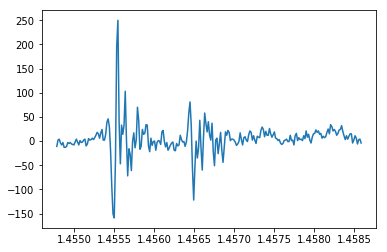

array([ -11,    2,    4,   -4,   -8,   -3,  -13,  -13,  -11,   -3,   -5,
         -3,   -6,   -7,   -8,   -2,    4,   -2,   -8,    1,   -3,   -2,
          2,    4,  -10,   -6,    5,    2,    3,    6,    3,    7,   12,
         18,   15,    6,   17,   24,    2,    2,   14,   39,   46,   30,
        -20,  -95, -151, -159,  -39,  195,  250,   37,  -47,   33,   14,
         33,  103,    3,  -72,  -16,  -27,  -61,   -1,   17,  -14,    2,
         70,   43,  -17,  -11,   24,   14,   16,   34,   33,  -10,  -22,
          6,   -9,   -1,    0,  -19,   -3,    1,    0,   -7,   19,   22,
         -1,  -12,   -3,  -19,  -14,   -8,   -4,   -2,  -19,  -20,   -5,
        -10,   -8,   12,    3,   -2,   -1,  -11,   -2,   21,   58,   81,
         32,  -58, -122,  -53,    0,  -35,  -14,   43,  -15,  -60,    7,
         58,   36,   19,   40,   12,    2,   37,  -22,  -51,    2,    6,
        -26,   -5,   18,  -19,  -44,  -11,   19,   12,   22,   18,    1,
          4,    4,    2,   -2,   -9,   -6,   -1,   

In [60]:
time = timeArray[front:back];
plt.plot(time, first);
plt.show();
first

In [61]:
fft = np.fft.fft(first, n=None, axis=-1, norm=None)
print(fft.size)
print(first.size)
#print(max(fft))
#print(np.std(np.log(fft)))
f1, t1, sxx2 = signal.spectrogram(first, sampFreq, nperseg=1)

250
250


In [62]:
len(first)



250

In [63]:
fft




array([ 1.17700000e+03+0.00000000e+00j,  3.90835761e+02+4.33478297e+02j,
       -4.60621812e+02+7.16812909e+01j, -1.89408709e+02+6.61375811e+02j,
       -2.51465614e+02+4.65265001e+02j, -3.80603371e+02-1.28216693e+02j,
       -5.46614333e+00+4.20386111e+01j, -1.01663206e+02+1.96909967e+02j,
       -8.57544620e+01-2.45825209e+01j,  6.35838026e+01-5.78460365e+00j,
        5.23810830e+02-1.77422675e+02j, -5.21476050e+02-3.36978183e+02j,
       -8.80635542e+01+1.25165394e+02j, -4.40070898e+02+4.55271559e+02j,
        1.18205662e+03+7.84332934e+02j,  3.90020447e+01-1.05374636e+03j,
       -2.61343221e+02-1.94415311e+02j, -8.31286783e+02+6.86918796e+00j,
        1.34810705e+02+8.57189226e+02j,  7.02761111e+02-8.35760105e+01j,
        2.78244093e+02-3.75570976e+02j, -7.04460428e+01-6.44852146e+02j,
       -8.98087867e+02+3.08193593e+02j,  7.36339761e+01+6.89593443e+02j,
        2.42380363e+02-1.45047683e+01j,  4.51827791e+02-1.34863047e+02j,
        3.04949128e+01-7.18933109e+02j, -4.08188759

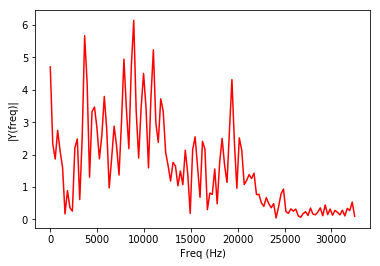

In [68]:
#first is the array we're passing in

def plotSpectrum(y,Fs):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t)
 """
 n = len(y) # length of the signal
 k = arange(n)
 T = n/Fs
 frq = k/T # two sides frequency range
 frq = frq[range(np.int(n/2))] # one side frequency range

 Y = np.fft.fft(y)/n # fft computing and normalization
 Y = Y[range(np.int(n/2))]
 
 plt.plot(frq,abs(Y),'r') # plotting the spectrum
 plt.xlabel('Freq (Hz)')
 plt.ylabel('|Y(freq)|')


plotSpectrum(first,sampFreq)
plt.show()

In [65]:

range(125)




range(0, 125)

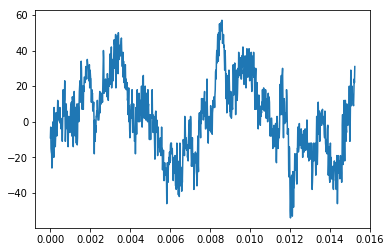

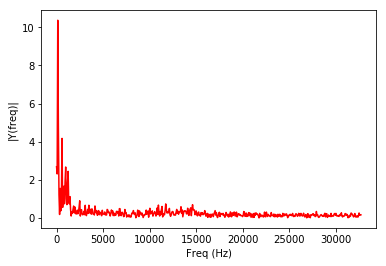

In [71]:
time2 = timeArray[0:1000]
first2 = s1[0:1000];
plt.plot(time2, first2)
plt.show()

plotSpectrum(first2,sampFreq)
plt.show()

In [ ]:
print(f1)
fig = plt.figure()
#fig, axes = plt.subplots(nrows=2, ncols=1)
ax1 = fig.add_axes( [0.12, 0.55, 0.75, 0.4] )
ax2 = fig.add_axes( [0.12, 0.1, 0.75, 0.4] )
ax3 = fig.add_axes( [0.88, 0.1, 0.02, 0.4] )
    
#--- Figure 1. ---#
ax1.plot(time, first)
ax1.set_ylabel('Amplitude')
#ax1.set_xlim(0, duration)
ax1.margins(x=0)

#--- Figure 2. ---#
#f, t, Sxx = signal.spectrogram(first, sampFreq, nperseg=250)
im = ax2.pcolormesh(t1, f1/1000, sxx2, cmap='jet' )

#ax1.scatter(timeArray[a],s1[a])

ax2.set_ylabel('Frequency [kHz]')
ax2.set_ylim(0,20)
ax2.set_xlabel('Time (s)')
ax2.margins(x=0)
im.set_clim(-10, 0)

mappable = im
cb = plt.colorbar(mappable = mappable, cax = ax3)
cb.set_label('db/Hz')
plt.show();

In [ ]:
def avgfreq(f, start, end):
    freq = f[start:end];
    print(freq);        

In [ ]:
def startOfPing(f):
    print(max(f))

In [ ]:
print(len(f), len(t), len(Sxx))
#diff of f is nperseg.

In [ ]:
max(f)

In [ ]:
128 * 256

In [ ]:
f

In [ ]:
len(f)